In [6]:
import numpy as np
import matplotlib.pyplot as plt

def data_x ():
    # question mark
    question = [0, 0, 1, 0, 0, 
                0, 1, 0, 1, 0, 
                0, 0, 0, 1, 0, 
                0, 0, 1, 0, 0, 
                0, 0, 0, 0, 0, 
                0, 0, 1, 0, 0]
    
    # exclamation mark
    exclamation = [0, 0, 1, 0, 0, 
                   0, 0, 1, 0, 0, 
                   0, 0, 1, 0, 0, 
                   0, 0, 1, 0, 0, 
                   0, 0, 0, 0, 0, 
                   0, 0, 1, 0, 0]

    # arrow up
    up = [0, 0, 1, 0, 0, 
          0, 1, 1, 1, 0, 
          1, 0, 1, 0, 1, 
          0, 0, 1, 0, 0, 
          0, 0, 1, 0, 0, 
          0, 0, 1, 0, 0]

    # down arrow
    down = [0, 0, 1, 0, 0, 
            0, 0, 1, 0, 0, 
            0, 0, 1, 0, 0, 
            1, 0, 1, 0, 1, 
            0, 1, 1, 1, 0, 
            0, 0, 1, 0, 0]

    x = [
        np.array(question).reshape(1, 30),
        np.array(exclamation).reshape(1, 30),
        np.array(up).reshape(1, 30),
        np.array(down).reshape(1, 30),
    ]

    plt.subplot(1, 5, 1)
    plt.imshow(np.array(question).reshape(6, 5))
    plt.subplot(1, 5, 2)
    plt.imshow(np.array(exclamation).reshape(6, 5))
    plt.subplot(1, 5, 3)
    plt.imshow(np.array(up).reshape(6, 5))
    plt.subplot(1, 5, 4)
    plt.imshow(np.array(down).reshape(6, 5))
    plt.show()

    return x

def data_y(): 
    out_abcfs = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0],  [0, 0, 0, 1]]
    y = np.array(out_abcfs)

    return y

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def forward(x, w1, w2):
    # hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    # output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    return (a2)

def generate(x, y):
    l = []
    for _ in range(x * y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x, y))


def loss(out, Y):
    s = (np.square(out - Y))
    s = np.sum(s) / len(y)
    return (s)


def back_prop(x, y, w1, w2, alpha):
    # hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    # output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2 - y)
    d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
                     (np.multiply(a1, 1 - a1)))

    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 = w1 - (alpha * (w1_adj))
    w2 = w2 - (alpha * (w2_adj))

    return (w1, w2)

def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_val = []
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            out = forward(x[i], w1, w2)
            l.append((loss(out, Y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("Epoch: ", j + 1, " Accuracy: ", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) / len(x))) * 100)
        loss_val.append(sum(l) / len(x))
    return (acc, loss_val, w1, w2)


def predict(x, w1, w2):
    res = forward(x, w1, w2)
    max_w = 0
    k = 0
    for i in range(len(res[0])):
        if (max_w < res[0][i]):
            max_w = res[0][i]
            k = i
    return k

def print_results(x, w1, w2):
    symbols = ['?', '!', '↑', '↓']
    for i in range(4):
        expected_letter = symbols[i]
        recognized_letter = symbols[predict(x[i], w1, w2)]
        print(f"Expected: {expected_letter} | Recognized: {recognized_letter} " f"| {True if expected_letter == recognized_letter else False}")



Inputs and labels

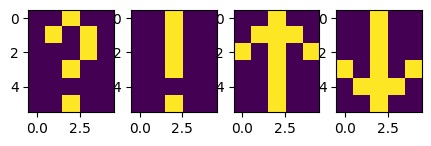

DataSet:
х =  [array([[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0]]), array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0]]), array([[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0]]), array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 0]])] 

Labels:
y =  [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]] 



In [7]:
x = data_x()
y = data_y()
print('DataSet:')
print('х = ', x, '\n')
print('Labels:')
print('y = ', y, '\n')

Weights:

In [8]:
w1 = generate(30, 4)
w2 = generate(4, 4)
print("Let's initialize the weights: ")
print('w1 = ', w1, '\n')
print('w2 = ', w2, '\n')

Let's initialize the weights: 
w1 =  [[ 2.40956275 -1.74228849  0.50404471  0.25961411]
 [-0.31146354 -0.38845972  0.63318437  0.42802598]
 [-0.02908121  0.48599953  0.04456974  0.53543511]
 [-1.06097765 -2.28623037 -1.4274242   0.47272771]
 [ 0.4954285  -0.02139861 -0.62693757  0.04912786]
 [ 0.25715679  0.32465666  1.02186076 -1.4952355 ]
 [ 0.91654372 -0.40368624 -0.75454993 -0.92365123]
 [ 0.15892755  0.93389733 -0.00439171  0.31168126]
 [-0.93429976 -0.41129128 -0.79118958 -0.15543827]
 [ 0.91753403  0.72040688 -0.14523273  0.52826517]
 [ 0.43135563  0.4660259   0.50115631 -1.23830621]
 [ 1.09442698  0.688033    0.49369158 -0.90210565]
 [ 0.34403414  0.49569622  0.01774119  0.72697918]
 [-1.54246418  0.68342721 -0.75045716  1.07416349]
 [-1.77585795 -1.60513565  0.61977653 -1.07718674]
 [ 0.76376876 -0.75440135 -0.37415716  1.01156309]
 [-0.72821326  0.50350603 -1.24200591  0.48834121]
 [-2.03394645  0.47573996  0.4499721   0.14265731]
 [-1.39295572 -0.12290861  0.26383657 -0.8921

Let's train the network

In [9]:
print('Network training')
acc, loss_value, w1, w2 = train(x, y, w1, w2, 0.1, 300)

Network training
Epoch:  1  Accuracy:  72.72990695035723
Epoch:  2  Accuracy:  75.14693302971557
Epoch:  3  Accuracy:  77.04514458188773
Epoch:  4  Accuracy:  78.51810278520462
Epoch:  5  Accuracy:  79.67836265262153
Epoch:  6  Accuracy:  80.62988082295878
Epoch:  7  Accuracy:  81.45861086870613
Epoch:  8  Accuracy:  82.2271658542504
Epoch:  9  Accuracy:  82.96433158710323
Epoch:  10  Accuracy:  83.65496177118914
Epoch:  11  Accuracy:  84.25688853046644
Epoch:  12  Accuracy:  84.74615934545066
Epoch:  13  Accuracy:  85.13518720778544
Epoch:  14  Accuracy:  85.45142668876584
Epoch:  15  Accuracy:  85.71839428051011
Epoch:  16  Accuracy:  85.95175092571274
Epoch:  17  Accuracy:  86.16127166614106
Epoch:  18  Accuracy:  86.35311536600818
Epoch:  19  Accuracy:  86.53130487617715
Epoch:  20  Accuracy:  86.69857988430422
Epoch:  21  Accuracy:  86.85688062877361
Epoch:  22  Accuracy:  87.00762860795757
Epoch:  23  Accuracy:  87.15189554161613
Epoch:  24  Accuracy:  87.29050914641172
Epoch:  2

Results:

Weight coefficients after training: 
w1 =  [[ 2.40956275 -1.74228849  0.50404471  0.25961411]
 [-0.31146354 -0.38845972  0.63318437  0.42802598]
 [ 0.75129165  0.06633381 -0.00496002  0.0239291 ]
 [-1.06097765 -2.28623037 -1.4274242   0.47272771]
 [ 0.4954285  -0.02139861 -0.62693757  0.04912786]
 [ 0.25715679  0.32465666  1.02186076 -1.4952355 ]
 [ 1.49589811 -1.67493678  0.9355514  -2.31197154]
 [ 1.54252224  1.32414223 -1.67465751  1.07758638]
 [-0.35494537 -1.68254182  0.89891176 -1.54375858]
 [ 0.91753403  0.72040688 -0.14523273  0.52826517]
 [ 1.61393184  0.00468596  0.57052161 -1.34921539]
 [ 1.09442698  0.688033    0.49369158 -0.90210565]
 [ 1.72762883  0.88594112 -1.6525246   1.49288431]
 [-2.14568601 -0.1264834   0.87027887 -0.20324764]
 [-0.59328174 -2.06647558  0.68914184 -1.18809591]
 [-0.66164269 -1.17208098  0.11094546  1.2822427 ]
 [-0.72821326  0.50350603 -1.24200591  0.48834121]
 [-1.25357359  0.05607425  0.40044234 -0.3688487 ]
 [-1.39295572 -0.12290861  0.26383657 -

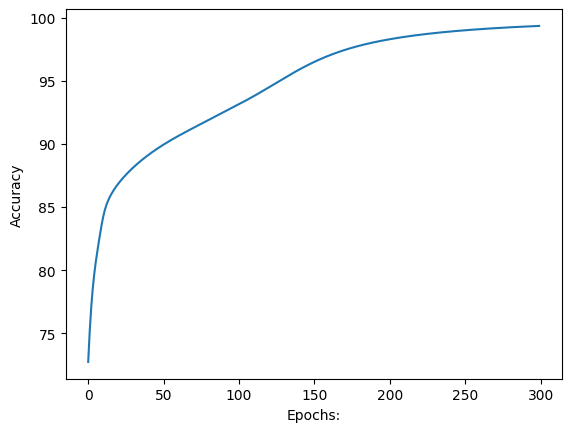

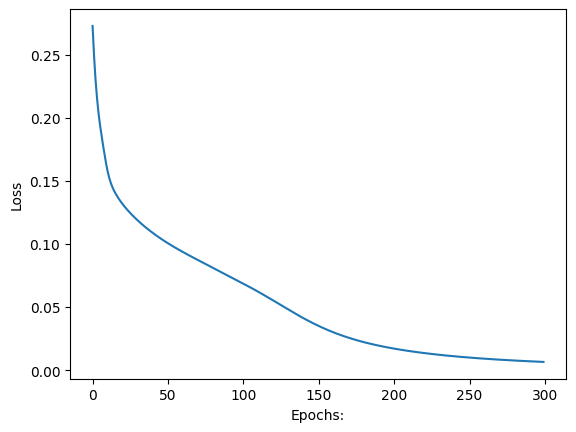

Expected: ? | Recognized: ? | True
Expected: ! | Recognized: ! | True
Expected: ↑ | Recognized: ↑ | True
Expected: ↓ | Recognized: ↓ | True


In [10]:
print('Weight coefficients after training: ')
print('w1 = ', w1, '\n')
print('w2 = ', w2, '\n')

plt.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs:")
plt.show()

plt.plot(loss_value)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt.show()

print_results(x, w1, w2)
